In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from committee_learning.ode import SquaredActivationODE
from committee_learning.initial_conditions import RandomNormalInitialConditions
from committee_learning.simulation import Simulation
from committee_learning.result import SquareODEResult, SimulationResult
import numpy as np

d_list = [1000]
p = 10
k = 5
gamma0 = 1.
noise = 1e-3
dt = 1e-1

ic = {d:RandomNormalInitialConditions(p,k,d) for d in d_list}

### Simulations

In [3]:
sims = [
  Simulation(d,p,k,noise,ic[d].Wteacher,gamma0,'square',ic[d].W0)
  for d in d_list
]

simrs = {}
for d, sim in zip(d_list, sims):
  print(f'Simulating d = {sim.d}')
  simr = SimulationResult(initial_condition='random')
  simr.from_file_or_run(sim,3.5+np.log10(sim.d),path='computation-database/sim/')
  simrs[d] = simr

Simulating d = 1000


### ODE

In [4]:
oders = {}
for d in d_list:
  ode = SquaredActivationODE(p,k,noise,gamma0,ic[d].P,ic[d].Q,ic[d].M,dt)
  oder = SquareODEResult('random_d={d}')
  oder.from_file_or_run(ode, 5, path='computation-database/ode/')
  oders[d] = oder

### Plot

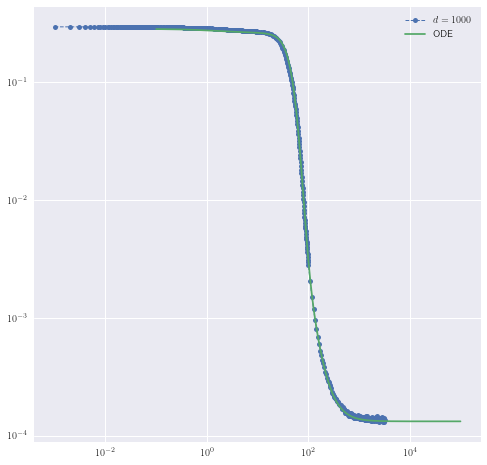

In [5]:
import matplotlib.pyplot as plt
from committee_learning.utilities import plot_style

with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  ax.set_xscale('log')
  ax.set_yscale('log')
  for d in d_list:
    t = np.array(simrs[d].steps) / d
    ax.plot(t, simrs[d].risks, label=f'$d={d}$',ls='--',lw=1.,marker='o',ms=5.)
    ax.plot(oders[d].times, oders[d].risks, label='ODE')
  ax.legend()
  plt.show()
  


344


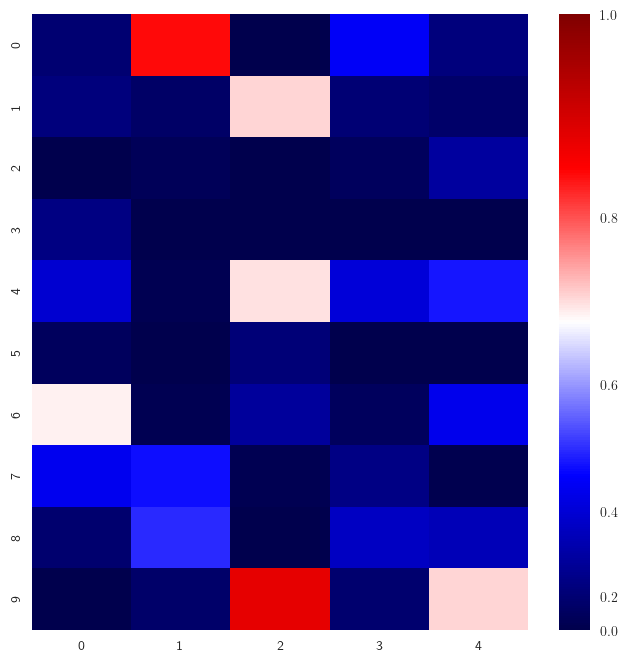

In [6]:
from committee_learning.utilities import macroscopic_variable_plot

macroscopic_variable_plot(simr.M_at_time(5e1))

In [7]:
with plot_style():
  fig, ax = plt.subplots(figsize=(8,8))
  seaborn.heatmap(
    abs(np.array(simrs[1000].P)),
    cmap='seismic',
    norm=PowerNorm(1.8,vmin=0.,vmax=1.),
    ax=ax
  )
  plt.show()

NameError: name 'seaborn' is not defined